In [115]:
import tensorflow as tf
import keras
from keras.layers import Dense                                                                   
from keras.layers import Conv2D, AveragePooling2D, Dropout, Flatten      
import numpy as np
import matplotlib.pyplot as plt

from deeplearning2020 import helpers

print(tf.config.list_physical_devices('GPU'))

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

%matplotlib inline

[]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12607033324551026646
]


## Data Preprocessing

In [116]:
batch_size = 128                                                                                 
num_classes = 10                                                                                 
epochs = 12                                                                                      
img_rows, img_cols = 28, 28                                                                      

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images_aug = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images_aug = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

train_images_aug = train_images_aug.astype('float32')
test_images_aug = test_images_aug.astype('float32')
train_images_aug = train_images_aug / 255.0
test_images_aug = test_images_aug / 255.0

#train_images_aug = np.pad(train_images_aug, ((0,0),(2,2),(2,2),(0,0)), 'constant')
#test_images_aug = np.pad(test_images_aug, ((0,0),(2,2),(2,2),(0,0)), 'constant')

train_vec_labels = keras.utils.to_categorical(train_labels, num_classes)
test_vec_labels = keras.utils.to_categorical(test_labels, num_classes)

## Display Data

In [117]:
print(train_vec_labels[50])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## Net Architectures

In [118]:
def LeNet5():    
    model = keras.Sequential()

    # Convolutional Layer 1
    # model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(32,32,1)))
    model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
    model.add(AveragePooling2D())

    # Convolutional Layer 2
    model.add(Conv2D(filters=6, kernel_size=(5, 5), padding='VALID', activation='relu'))
    model.add(AveragePooling2D())

    model.add(Flatten())

    # Hidden Layer 1
    model.add(Dense(units=120, activation='relu'))

    # Hidden Layer 2
    model.add(Dense(units=84, activation='relu'))

    # Output Layer
    model.add(Dense(units=10, activation='softmax'))
    
    return model

## Compile and Train Network

In [119]:
model = LeNet5()
model.summary()

sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(
    optimizer=keras.optimizers.Adadelta(),
    loss=keras.losses.categorical_crossentropy,
    metrics=['acc'])

history = model.fit(train_images_aug, train_vec_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=True,
          validation_data=(test_images_aug, test_vec_labels))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_13 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 6)           906       
_________________________________________________________________
average_pooling2d_14 (Averag (None, 4, 4, 6)           0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 120)               11640     
_________________________________________________________________
dense_20 (Dense)             (None, 84)               

## Evaluate Model

In [120]:
eval_loss, eval_accuracy = model.evaluate(test_images_aug, test_vec_labels, verbose=False)
print("Model accuracy: %.2f" % eval_accuracy)

Model accuracy: 0.88


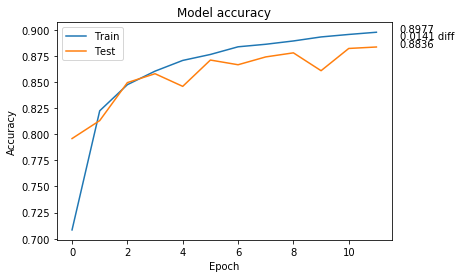

In [121]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.annotate('%0.4f' % history.history['acc'][-1], xy=(1, history.history['acc'][-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % history.history['val_acc'][-1], xy=(1, history.history['val_acc'][-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % (history.history['acc'][-1] - history.history['val_acc'][-1]) + " diff", xy=(1, (history.history['acc'][-1] + history.history['val_acc'][-1])/2), xytext=(8, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.show()

# heavy overfitting

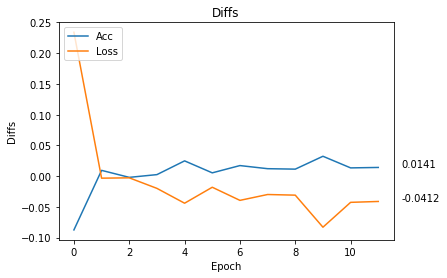

In [122]:
# Plot diff between training and validation for accuracy and loss
diff_acc = np.asarray(history.history['acc']) - np.asarray(history.history['val_acc'])
diff_loss = np.asarray(history.history['loss']) - np.asarray(history.history['val_loss'])
plt.plot(diff_acc)
plt.plot(diff_loss)
plt.title('Diffs')
plt.ylabel('Diffs')
plt.xlabel('Epoch')
plt.legend(['Acc', 'Loss'], loc='upper left')
plt.annotate('%0.4f' % diff_acc[-1], xy=(1, diff_acc[-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % diff_loss[-1], xy=(1, diff_loss[-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.show()

In [134]:
!pip install --upgrade deeplearning2020
from deeplearning2020 import Submission
Submission('3a850b62ce7875f05c1d5a3465803421', '2', model).submit()

Failed to connect to provider at https://neuralnet.xopic.de/ltiprovider
